## Calculate Ratio of Seed Terms

Date created: November 16, 2022

Date last modified: November 21, 2022

This notebook:
- Uses these term counts for each perspective and the total word count (in `word_count` column) to compute the document-level ratio for each perspective, for both full and seed counts, and stores the output csv as `models_storage/ratios_and_subject.csv`
- Creates histograms to compare the ngram ratio distribution for each perspective, for both samples & full
- Does t tests to see whether mean of negative distribution is different from positive.
- Does pearson's correlation test to see the correlation between ngram ratios & true labels.

In [2]:
import pandas as pd

## Calculate ngram ratios

In [3]:
counts = pd.read_csv('counts_and_subject.csv')

/Users/nancyxu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
counts

,article_id,culture_ngram_count,culture_ngram_count.1,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year,journal_title,journal_id
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,0,Sociology,1978,Contemporary Sociology,j100496
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,0,Management & Organizational Behavior,1986,Public Productivity & Management Review,j100852
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,0,Sociology,1983,American Sociological Review,j100080
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,0,Management & Organizational Behavior,1985,Management Science,j100269
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,0,Management & Organizational Behavior,2005,MIR: Management International Review,j50000481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69653,journal-article-10.2307_24720916,28,6,55,5,12,11,8429,0,0,0,Sociology,2014,Social Indicators Research,j50000231
69654,journal-article-10.2307_jcorpciti.19.5,5,4,52,15,21,7,6058,0,0,0,Management & Organizational Behavior,2005,Journal of Corporate Citizenship,jcorpciti
69655,journal-article-10.2307_24720853,42,2,10,5,16,6,6560,0,0,0,Sociology,2014,Social Indicators Research,j50000231
69656,journal-article-10.2307_4494934,21,10,58,31,16,11,7650,0,0,0,Sociology,1999,Social Forces,j100364


In [5]:
correct_col_names = {
    
    'culture_ngram_count':'culture_ngram_count_full',
    'culture_ngram_count.1':'culture_ngram_count_core',
    'relational_ngram_count':'relational_ngram_count_full',
    'relational_ngram_count.1':'relational_ngram_count_core',
    'demographic_ngram_count':'demographic_ngram_count_full',
    'demographic_ngram_count.1':'demographic_ngram_count_core'
}

In [6]:
counts = counts.rename(columns=correct_col_names)

In [7]:
counts

,article_id,culture_ngram_count_full,culture_ngram_count_core,relational_ngram_count_full,relational_ngram_count_core,demographic_ngram_count_full,demographic_ngram_count_core,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year,journal_title,journal_id
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,0,Sociology,1978,Contemporary Sociology,j100496
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,0,Management & Organizational Behavior,1986,Public Productivity & Management Review,j100852
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,0,Sociology,1983,American Sociological Review,j100080
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,0,Management & Organizational Behavior,1985,Management Science,j100269
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,0,Management & Organizational Behavior,2005,MIR: Management International Review,j50000481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69653,journal-article-10.2307_24720916,28,6,55,5,12,11,8429,0,0,0,Sociology,2014,Social Indicators Research,j50000231
69654,journal-article-10.2307_jcorpciti.19.5,5,4,52,15,21,7,6058,0,0,0,Management & Organizational Behavior,2005,Journal of Corporate Citizenship,jcorpciti
69655,journal-article-10.2307_24720853,42,2,10,5,16,6,6560,0,0,0,Sociology,2014,Social Indicators Research,j50000231
69656,journal-article-10.2307_4494934,21,10,58,31,16,11,7650,0,0,0,Sociology,1999,Social Forces,j100364


In [8]:
new_cols = ['culture_ngram_ratio_full','culture_ngram_ratio_core','relational_ngram_ratio_full',
            'relational_ngram_ratio_core','demographic_ngram_ratio_full','demographic_ngram_ratio_core']

In [9]:
counts['culture_ngram_ratio_full'] = counts['culture_ngram_count_full']/counts['word_count']

In [10]:
counts['culture_ngram_ratio_core'] = counts['culture_ngram_count_core']/counts['word_count']

In [11]:
counts['relational_ngram_ratio_full'] = counts['relational_ngram_count_full']/counts['word_count']

In [12]:
counts['relational_ngram_ratio_core'] = counts['relational_ngram_count_core']/counts['word_count']

In [13]:
counts['demographic_ngram_ratio_core'] = counts['demographic_ngram_count_core']/counts['word_count']

In [14]:
counts['demographic_ngram_ratio_full'] = counts['demographic_ngram_count_full']/counts['word_count']

In [15]:
counts

,article_id,culture_ngram_count_full,culture_ngram_count_core,relational_ngram_count_full,relational_ngram_count_core,demographic_ngram_count_full,demographic_ngram_count_core,word_count,cultural_author_count,demographic_author_count,...,primary_subject,year,journal_title,journal_id,culture_ngram_ratio_full,culture_ngram_ratio_core,relational_ngram_ratio_full,relational_ngram_ratio_core,demographic_ngram_ratio_core,demographic_ngram_ratio_full
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,...,Sociology,1978,Contemporary Sociology,j100496,0.002550,0.000850,0.003117,0.001417,0.001984,0.002834
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,...,Management & Organizational Behavior,1986,Public Productivity & Management Review,j100852,0.001925,0.001155,0.005197,0.001347,0.000962,0.001347
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,...,Sociology,1983,American Sociological Review,j100080,0.008028,0.000845,0.008592,0.003380,0.008592,0.003662
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,...,Management & Organizational Behavior,1985,Management Science,j100269,0.006349,0.000000,0.012698,0.000000,0.000000,0.000000
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,...,Management & Organizational Behavior,2005,MIR: Management International Review,j50000481,0.010408,0.007314,0.012799,0.003938,0.000985,0.004219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69653,journal-article-10.2307_24720916,28,6,55,5,12,11,8429,0,0,...,Sociology,2014,Social Indicators Research,j50000231,0.003322,0.000712,0.006525,0.000593,0.001305,0.001424
69654,journal-article-10.2307_jcorpciti.19.5,5,4,52,15,21,7,6058,0,0,...,Management & Organizational Behavior,2005,Journal of Corporate Citizenship,jcorpciti,0.000825,0.000660,0.008584,0.002476,0.001155,0.003466
69655,journal-article-10.2307_24720853,42,2,10,5,16,6,6560,0,0,...,Sociology,2014,Social Indicators Research,j50000231,0.006402,0.000305,0.001524,0.000762,0.000915,0.002439
69656,journal-article-10.2307_4494934,21,10,58,31,16,11,7650,0,0,...,Sociology,1999,Social Forces,j100364,0.002745,0.001307,0.007582,0.004052,0.001438,0.002092


In [16]:
import matplotlib.pyplot as plt

In [17]:
counts.to_csv('counts_and_subject_modified.csv')

In [18]:
neg_dem = pd.read_csv('neg_dem_full_cwmd_df.csv')

In [19]:
pos_dem = pd.read_csv('pos_dem_full_cwmd_df.csv')

In [20]:
neg_rela = pd.read_csv('neg_rela_full_cwmd_df.csv')

In [21]:
pos_rela = pd.read_csv('pos_rela_full_cwmd_df.csv')

In [22]:
neg_cult = pd.read_csv('neg_cult_full_cwmd_df.csv')

In [23]:
pos_cult = pd.read_csv('pos_cult_full_cwmd_df.csv')

In [24]:
counts

,article_id,culture_ngram_count_full,culture_ngram_count_core,relational_ngram_count_full,relational_ngram_count_core,demographic_ngram_count_full,demographic_ngram_count_core,word_count,cultural_author_count,demographic_author_count,...,primary_subject,year,journal_title,journal_id,culture_ngram_ratio_full,culture_ngram_ratio_core,relational_ngram_ratio_full,relational_ngram_ratio_core,demographic_ngram_ratio_core,demographic_ngram_ratio_full
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,...,Sociology,1978,Contemporary Sociology,j100496,0.002550,0.000850,0.003117,0.001417,0.001984,0.002834
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,...,Management & Organizational Behavior,1986,Public Productivity & Management Review,j100852,0.001925,0.001155,0.005197,0.001347,0.000962,0.001347
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,...,Sociology,1983,American Sociological Review,j100080,0.008028,0.000845,0.008592,0.003380,0.008592,0.003662
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,...,Management & Organizational Behavior,1985,Management Science,j100269,0.006349,0.000000,0.012698,0.000000,0.000000,0.000000
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,...,Management & Organizational Behavior,2005,MIR: Management International Review,j50000481,0.010408,0.007314,0.012799,0.003938,0.000985,0.004219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69653,journal-article-10.2307_24720916,28,6,55,5,12,11,8429,0,0,...,Sociology,2014,Social Indicators Research,j50000231,0.003322,0.000712,0.006525,0.000593,0.001305,0.001424
69654,journal-article-10.2307_jcorpciti.19.5,5,4,52,15,21,7,6058,0,0,...,Management & Organizational Behavior,2005,Journal of Corporate Citizenship,jcorpciti,0.000825,0.000660,0.008584,0.002476,0.001155,0.003466
69655,journal-article-10.2307_24720853,42,2,10,5,16,6,6560,0,0,...,Sociology,2014,Social Indicators Research,j50000231,0.006402,0.000305,0.001524,0.000762,0.000915,0.002439
69656,journal-article-10.2307_4494934,21,10,58,31,16,11,7650,0,0,...,Sociology,1999,Social Forces,j100364,0.002745,0.001307,0.007582,0.004052,0.001438,0.002092


In [25]:
counts.to_csv('ratios_and_subject.csv')

In [26]:
counts['edited_filename'] = counts['article_id'].str.split('-')

In [27]:
import numpy as np
ef = []
for k in np.arange(len(counts)):
    try:
        ef_val = counts.loc[k,'article_id'].split('-')[2]
        ef.append(ef_val)
    except:
        ef.append(0)

In [28]:
counts['edited_filename'] = ef

In [29]:
counts

,article_id,culture_ngram_count_full,culture_ngram_count_core,relational_ngram_count_full,relational_ngram_count_core,demographic_ngram_count_full,demographic_ngram_count_core,word_count,cultural_author_count,demographic_author_count,...,year,journal_title,journal_id,culture_ngram_ratio_full,culture_ngram_ratio_core,relational_ngram_ratio_full,relational_ngram_ratio_core,demographic_ngram_ratio_core,demographic_ngram_ratio_full,edited_filename
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,...,1978,Contemporary Sociology,j100496,0.002550,0.000850,0.003117,0.001417,0.001984,0.002834,10.2307_2065002
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,...,1986,Public Productivity & Management Review,j100852,0.001925,0.001155,0.005197,0.001347,0.000962,0.001347,10.2307_3380821
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,...,1983,American Sociological Review,j100080,0.008028,0.000845,0.008592,0.003380,0.008592,0.003662,10.2307_2095822
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,...,1985,Management Science,j100269,0.006349,0.000000,0.012698,0.000000,0.000000,0.000000,10.2307_2631839
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,...,2005,MIR: Management International Review,j50000481,0.010408,0.007314,0.012799,0.003938,0.000985,0.004219,10.2307_40836133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69653,journal-article-10.2307_24720916,28,6,55,5,12,11,8429,0,0,...,2014,Social Indicators Research,j50000231,0.003322,0.000712,0.006525,0.000593,0.001305,0.001424,10.2307_24720916
69654,journal-article-10.2307_jcorpciti.19.5,5,4,52,15,21,7,6058,0,0,...,2005,Journal of Corporate Citizenship,jcorpciti,0.000825,0.000660,0.008584,0.002476,0.001155,0.003466,10.2307_jcorpciti.19.5
69655,journal-article-10.2307_24720853,42,2,10,5,16,6,6560,0,0,...,2014,Social Indicators Research,j50000231,0.006402,0.000305,0.001524,0.000762,0.000915,0.002439,10.2307_24720853
69656,journal-article-10.2307_4494934,21,10,58,31,16,11,7650,0,0,...,1999,Social Forces,j100364,0.002745,0.001307,0.007582,0.004052,0.001438,0.002092,10.2307_4494934


In [30]:
neg_dem_joined = neg_dem.merge(counts,how='left', on = 'edited_filename')

In [31]:
pos_dem_joined = pos_dem.merge(counts,how='left', on = 'edited_filename')

In [32]:
neg_cult_joined = neg_cult.merge(counts,how='left', on = 'edited_filename')

In [33]:
pos_cult_joined = pos_cult.merge(counts,how='left', on = 'edited_filename')

In [34]:
neg_rela_joined = neg_rela.merge(counts,how='left', on = 'edited_filename')

In [35]:
pos_rela_joined = pos_rela.merge(counts,how='left', on = 'edited_filename')

In [36]:
pos_rela_joined

,Unnamed: 0,X,edited_filename,article_name,processed,classified_perspective_wmd,classified_perspective_cos,normalized_dem_wmd,normalized_rela_wmd,normalized_cult_wmd,...,primary_subject,year,journal_title,journal_id,culture_ngram_ratio_full,culture_ngram_ratio_core,relational_ngram_ratio_full,relational_ngram_ratio_core,demographic_ngram_ratio_core,demographic_ngram_ratio_full
0,1,0,10.1086_210317,Civil Rights Law at Work: Sex Discrimination a...,civil rights law work sex discrimination rise...,cultural,cultural,0.400919,0.427673,0.440051,...,Sociology,1999,American Journal of Sociology,amerjsoci,0.004527,0.001928,0.008718,0.003437,0.000587,0.002683
1,2,1,10.1086_231174,World Society and the Nation‐State,world society nation state john meyer stanfor...,cultural,cultural,0.396334,0.416208,0.457068,...,Sociology,1997,American Journal of Sociology,amerjsoci,0.015211,0.019508,0.009196,0.005070,0.003524,0.007305
2,3,2,10.1086_382347,Kinship Networks and Entrepreneurs in China’s ...,introduction economists long concurred instit...,cultural,relational,0.395865,0.434171,0.438877,...,Sociology,2004,American Journal of Sociology,amerjsoci,0.005700,0.008369,0.026198,0.008369,0.002790,0.002426
3,4,3,10.1086_517899,What Is Organizational Imprinting? Cultural En...,introduction organizational sociologists long...,cultural,cultural,0.401219,0.417809,0.449987,...,Sociology,2007,American Journal of Sociology,amerjsoci,0.011879,0.013428,0.009425,0.002970,0.004003,0.008263
4,5,4,10.1086_588742,"Homeward Bound? Interest, Identity, and Invest...",introduction indigenous investors third world...,relational,relational,0.403552,0.433103,0.431777,...,Sociology,2008,American Journal of Sociology,amerjsoci,0.003866,0.000499,0.009228,0.002120,0.002120,0.005861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,229,10.2307_2778293,Institutionalized Organizations: Formal Struct...,institutionalized organizations formal struct...,cultural,cultural,0.390062,0.417605,0.462607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,231,230,10.2307_2667051,The Social Construction of Organizational Know...,social construction organizational knowledge ...,cultural,cultural,0.388992,0.413328,0.468507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,232,231,10.2307_2392303,Organizational Structure and the Institutional...,organizational structure institutional enviro...,cultural,cultural,0.399029,0.421063,0.448942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,233,232,10.2307_2392383,Institutional Sources of Change in the Formal ...,institutional sources change formal structure...,cultural,relational,0.401892,0.421086,0.445812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Histogram of ngram ratios for each perspective (sample and full)

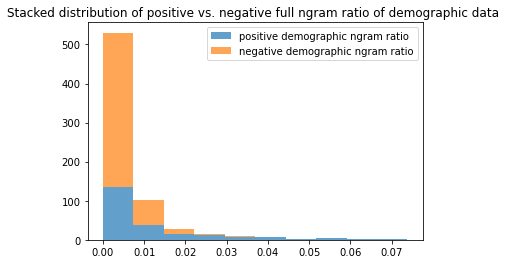

In [37]:
bins = np.arange(0.2,0.5,0.001)
labels = ['positive demographic ngram ratio','negative demographic ngram ratio']

plt.hist([pos_dem_joined['demographic_ngram_ratio_full'], neg_dem_joined['demographic_ngram_ratio_full']], histtype='bar', alpha = 0.7,stacked=True, label=labels, rwidth=1)
plt.title('Stacked distribution of positive vs. negative full ngram ratio of demographic data ')
plt.legend()



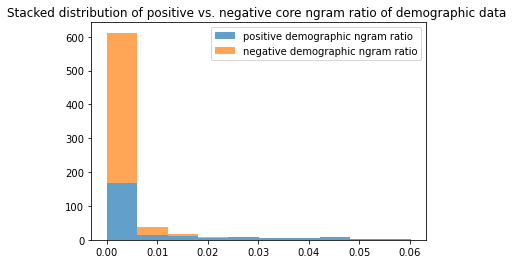

In [38]:
bins = np.arange(0.2,0.5,0.001)
labels = ['positive demographic ngram ratio','negative demographic ngram ratio']

plt.hist([pos_dem_joined['demographic_ngram_ratio_core'], neg_dem_joined['demographic_ngram_ratio_core']], histtype='bar', alpha = 0.7,stacked=True, label=labels, rwidth=1)
plt.title('Stacked distribution of positive vs. negative core ngram ratio of demographic data ')
plt.legend()



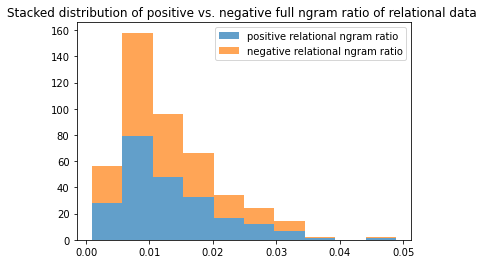

In [39]:
bins = np.arange(0.2,0.5,0.001)
labels = ['positive relational ngram ratio','negative relational ngram ratio']

plt.hist([pos_dem_joined['relational_ngram_ratio_full'], pos_dem_joined['relational_ngram_ratio_full']], histtype='bar', alpha = 0.7,stacked=True, label=labels, rwidth=1)
plt.title('Stacked distribution of positive vs. negative full ngram ratio of relational data ')
plt.legend()



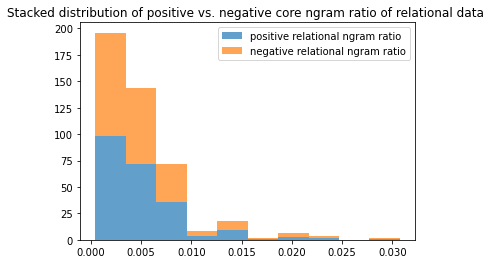

In [40]:
bins = np.arange(0.2,0.5,0.001)
labels = ['positive relational ngram ratio','negative relational ngram ratio']

plt.hist([pos_dem_joined['relational_ngram_ratio_core'], pos_dem_joined['relational_ngram_ratio_core']], histtype='bar', alpha = 0.7,stacked=True, label=labels, rwidth=1)
plt.title('Stacked distribution of positive vs. negative core ngram ratio of relational data ')
plt.legend()



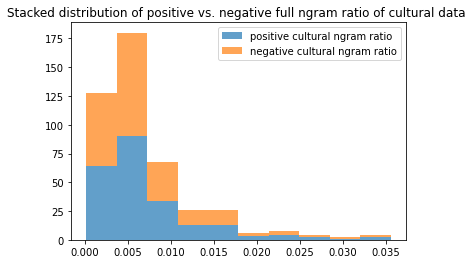

In [41]:
bins = np.arange(0.2,0.5,0.001)
labels = ['positive cultural ngram ratio','negative cultural ngram ratio']

plt.hist([pos_dem_joined['culture_ngram_ratio_full'], pos_dem_joined['culture_ngram_ratio_full']], histtype='bar', alpha = 0.7,stacked=True, label=labels, rwidth=1)
plt.title('Stacked distribution of positive vs. negative full ngram ratio of cultural data ')
plt.legend()



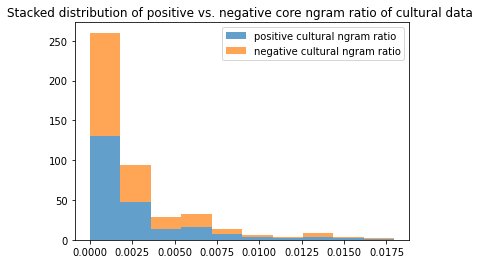

In [42]:
bins = np.arange(0.2,0.5,0.001)
labels = ['positive cultural ngram ratio','negative cultural ngram ratio']

plt.hist([pos_dem_joined['culture_ngram_ratio_core'], pos_dem_joined['culture_ngram_ratio_core']], histtype='bar', alpha = 0.7,stacked=True, label=labels, rwidth=1)
plt.title('Stacked distribution of positive vs. negative core ngram ratio of cultural data ')
plt.legend()



## Use T test to test whether mean of distribution of negative data is different from positive data

H0 => µ1 = µ2 (population mean of positive data is equal to negative data)


HA => µ1 ≠µ2 (population mean of positive data is different from negative data)


In [43]:
pos_cult_joined = pos_cult_joined.dropna()
neg_cult_joined = neg_cult_joined.dropna()

In [44]:
import scipy.stats as stats
 
# Creating data groups
data_group1 = pos_cult_joined['culture_ngram_ratio_core']
 
data_group2 = neg_cult_joined['culture_ngram_ratio_core']
 
# Perform the two sample t-test with equal variances
print(np.var(data_group1), np.var(data_group2))

7.410366716129273e-05 1.7331275613856682e-05


In [45]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=12.688517258440145, pvalue=2.5957197958733944e-33)

In [46]:
pos_dem_joined = pos_dem_joined.dropna()
neg_dem_joined = neg_dem_joined.dropna()

In [47]:
import scipy.stats as stats
 
# Creating data groups
data_group1 = pos_dem_joined['demographic_ngram_ratio_core']
 
data_group2 = neg_dem_joined['demographic_ngram_ratio_core']
 
# Perform the two sample t-test with equal variances
print(np.var(data_group1), np.var(data_group2))

0.00015642609246884308 7.497458152552845e-06


In [48]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=9.48827762657839, pvalue=3.5824735549951456e-20)

In [49]:
pos_rela_joined = pos_rela_joined.dropna()
neg_rela_joined = neg_rela_joined.dropna()

In [50]:
pos_rela_joined = pos_rela_joined.dropna()
neg_rela_joined = neg_rela_joined.dropna()

In [51]:
import scipy.stats as stats
 
# Creating data groups
data_group1 = pos_rela_joined['relational_ngram_ratio_core']
 
data_group2 = neg_rela_joined['relational_ngram_ratio_core']
 
# Perform the two sample t-test with equal variances
print(np.var(data_group1), np.var(data_group2))

1.576579123155756e-05 1.368239959427734e-05


In [52]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=4.308643487575189, pvalue=1.9027068526712966e-05)

## Pearson's R between ngram ratio (core/full) and true label

In [55]:
pos_rela_joined['rela_label']=1
neg_rela_joined['rela_label']=0
rela_df = pd.concat([pos_rela_joined,neg_rela_joined])

In [60]:
stats.pearsonr(rela_df['relational_ngram_ratio_full'],rela_df['rela_label'])

(0.10910250604127131, 0.005804631912096171)

In [61]:
stats.pearsonr(rela_df['relational_ngram_ratio_core'],rela_df['rela_label'])

(0.16840863929732242, 1.9027068526704198e-05)

In [62]:
pos_cult_joined['cult_label']=1
neg_cult_joined['cult_label']=0
cult_df = pd.concat([pos_cult_joined,neg_cult_joined])

In [65]:
stats.pearsonr(cult_df['culture_ngram_ratio_full'],cult_df['cult_label'])

(0.3572506761800388, 2.7373065661515114e-22)

In [66]:
stats.pearsonr(cult_df['culture_ngram_ratio_core'],cult_df['cult_label'])

(0.4347018287546427, 2.5957197958726123e-33)

In [69]:
pos_dem_joined['dem_label']=1
neg_dem_joined['dem_label']=0
dem_df = pd.concat([pos_dem_joined,neg_dem_joined])

In [70]:
stats.pearsonr(dem_df['demographic_ngram_ratio_full'],dem_df['dem_label'])

(0.333642901052054, 9.694451943113726e-20)

In [71]:
stats.pearsonr(dem_df['demographic_ngram_ratio_core'],dem_df['dem_label'])

(0.3373584687141607, 3.5824735549966846e-20)